In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc

In [2]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('/content/Bank Customer Churn Prediction.csv')

In [4]:
le_country = LabelEncoder()
le_gender = LabelEncoder()
df['country'] = le_country.fit_transform(df['country'])
df['gender'] = le_gender.fit_transform(df['gender'])

In [5]:
X = df.drop(columns=['customer_id', 'churn'])
y = df['churn']


In [6]:
churn_counts = df['churn'].value_counts()
churn_counts

,count
churn,
0,7963
1,2037


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from imblearn.over_sampling import RandomOverSampler

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [11]:
churn_counts = y_resampled.value_counts()
churn_counts

,count
churn,
1,7963
0,7963


In [12]:
# Logistic Regression Model
model_log = LogisticRegression(class_weight='balanced')
model_log.fit(X_train, y_train)
y_pred = model_log.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.4f}')


Logistic Regression Accuracy: 0.7065


In [13]:


# Predictions
y_pred = model_log.predict(X_test)
y_pred_prob = model_log.predict(X_test)    # for ROC-AUC
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Precision-Recall and F1 Score
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc:.4f}")

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc:.4f}")
print('Logistic Regression Model')

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1607
           1       0.37      0.68      0.48       393

    accuracy                           0.71      2000
   macro avg       0.63      0.70      0.64      2000
weighted avg       0.80      0.71      0.73      2000

ROC-AUC: 0.6982
PR AUC: 0.5570
Logistic Regression Model


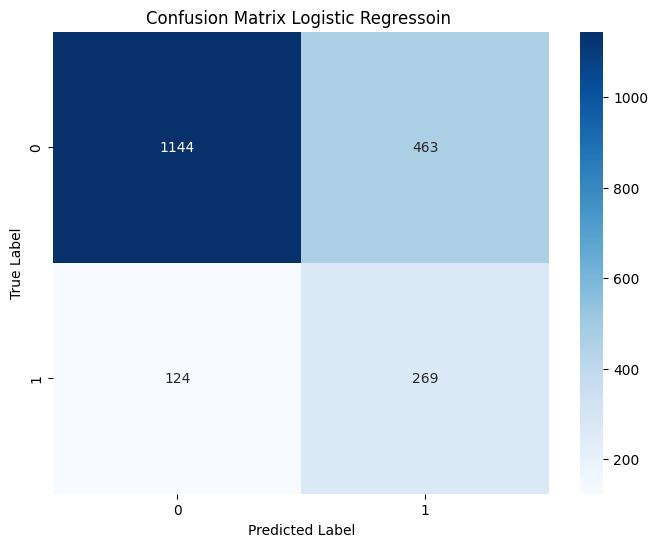

In [14]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Logistic Regressoin ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [15]:
# model Random Forest
model_random_forest=RandomForestClassifier(class_weight='balanced')
model_random_forest.fit(X_train, y_train)
y_pred = model_random_forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy:.4f}')

Random Forest Accuracy: 0.8675


In [16]:

# Predictions
y_pred = model_random_forest.predict(X_test)
y_pred_prob = model_random_forest.predict(X_test)    # for ROC-AUC
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Precision-Recall and F1 Score
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc:.4f}")

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc:.4f}")
print('Random Forest Model')

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.79      0.45      0.57       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.75      2000
weighted avg       0.86      0.87      0.85      2000

ROC-AUC: 0.7080
PR AUC: 0.6713
Random Forest Model


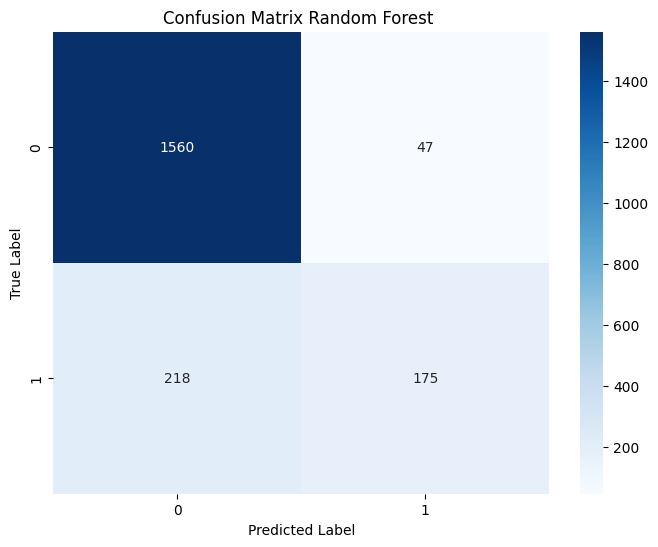

In [17]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Random Forest ')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [18]:
# model XGBClassifier
model_XGB=XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_XGB.fit(X_train, y_train)
y_pred = model_XGB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'XGBoost Accuracy: {accuracy:.4f}')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:24:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.8610


In [19]:

# Predictions
y_pred = model_XGB.predict(X_test)
y_pred_prob = model_XGB.predict(X_test)    # for ROC-AUC
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Precision-Recall and F1 Score
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc:.4f}")

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc:.4f}")
print('XGBoost Model')

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1607
           1       0.70      0.51      0.59       393

    accuracy                           0.86      2000
   macro avg       0.80      0.73      0.75      2000
weighted avg       0.85      0.86      0.85      2000

ROC-AUC: 0.7270
PR AUC: 0.6533
XGBoost Model


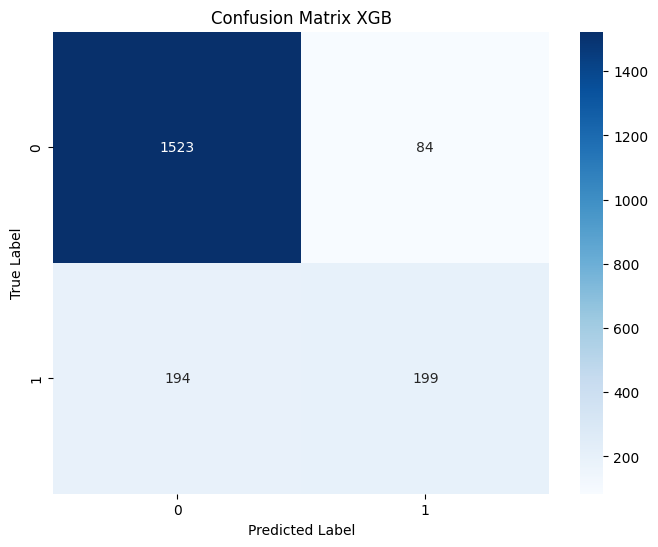

In [20]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix XGB')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [21]:
# model svc
model_svc=SVC(class_weight='balanced')
model_svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'SVC Accuracy: {accuracy:.4f}')


SVC Accuracy: 0.7785


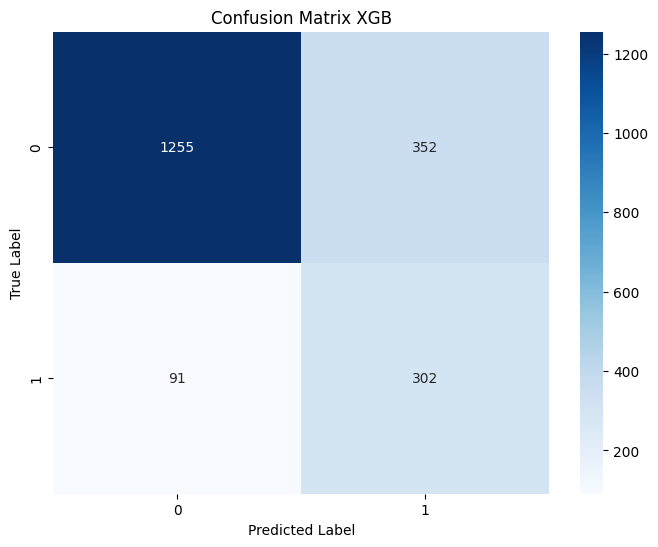

In [22]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix XGB')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [23]:
# Predictions
y_pred = model_svc.predict(X_test)
y_pred_prob = model_svc.predict(X_test)    # for ROC-AUC
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Precision-Recall and F1 Score
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc:.4f}")

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc:.4f}")
print('SVM Model')

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1607
           1       0.46      0.77      0.58       393

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.71      2000
weighted avg       0.84      0.78      0.80      2000

ROC-AUC: 0.7747
PR AUC: 0.6379
SVM Model


In [24]:
# model knn
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'KNN Accuracy: {accuracy:.4f}')

KNN Accuracy: 0.7785


In [25]:
# Predictions
y_pred = model_svc.predict(X_test)
y_pred_prob = model_svc.predict(X_test)    # for ROC-AUC
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Precision-Recall and F1 Score
print(classification_report(y_test, y_pred))

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC: {roc_auc:.4f}")

# Precision-Recall AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
pr_auc = auc(recall, precision)
print(f"PR AUC: {pr_auc:.4f}")
print('KNN Model')

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1607
           1       0.46      0.77      0.58       393

    accuracy                           0.78      2000
   macro avg       0.70      0.77      0.71      2000
weighted avg       0.84      0.78      0.80      2000

ROC-AUC: 0.7747
PR AUC: 0.6379
KNN Model


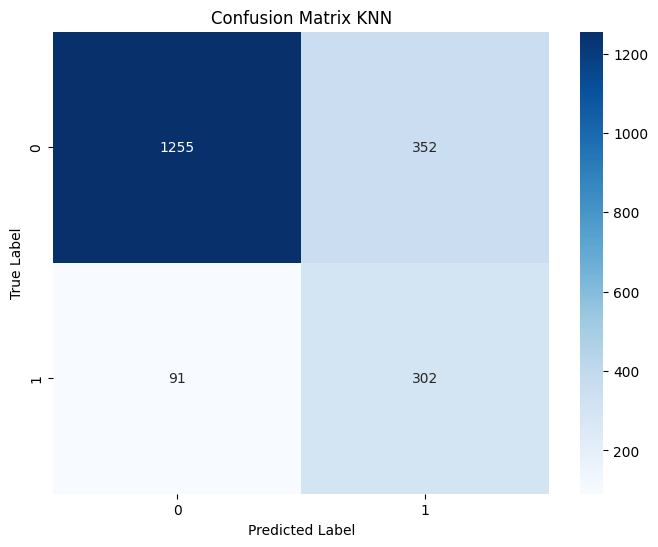

In [27]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()